In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
dataset1=r"C:\Users\Dell\OneDrive\Desktop\Softsensor.ai\public_150k_plus_220403.csv"
dataset2=r"C:\Users\Dell\OneDrive\Desktop\Softsensor.ai\public_up_to_150k_1_220403.csv"
dataset3=r"C:\Users\Dell\OneDrive\Desktop\Softsensor.ai\public_up_to_150k_2_220403.csv"
df = pd.concat(map(pd.read_csv, [dataset1,dataset2,dataset3]))

In [66]:
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,5/1/2020,464.0,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,Corporation,19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,5/1/2020,464.0,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,9/28/2021,...,Sole Proprietorship,19248.0,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,8/12/2021
2,5791407702,5/1/2020,1013.0,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,3/17/2021,...,Non-Profit Organization,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,2/10/2021
3,6223567700,5/1/2020,920.0,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,...,Corporation,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,9/10/2021
4,9662437702,5/1/2020,101.0,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,8/17/2021,...,NaN,57328.0,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,4/8/2021


## <font color = green>Data Cleaning & Preparation</font>

In [67]:
df.isnull().sum()

LoanNumber                           0
DateApproved                         0
SBAOfficeCode                       23
ProcessingMethod                     0
BorrowerName                        13
BorrowerAddress                    160
BorrowerCity                       159
BorrowerState                      160
BorrowerZip                        157
LoanStatusDate                  426586
LoanStatus                           0
Term                                 0
SBAGuarantyPercentage                0
InitialApprovalAmount                0
CurrentApprovalAmount                0
UndisbursedAmount                  461
FranchiseName                  2713185
ServicingLenderLocationID           23
ServicingLenderName                 23
ServicingLenderAddress              23
ServicingLenderCity                 23
ServicingLenderState                23
ServicingLenderZip                  23
RuralUrbanIndicator                  0
HubzoneIndicator                     0
LMIIndicator             

In [68]:
df.describe()

,LoanNumber,SBAOfficeCode,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderLocationID,JobsReported,NAICSCode,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,OriginatingLenderLocationID,ForgivenessAmount
count,2.768532e+06,2.768509e+06,2.768532e+06,2768532.0,2.768532e+06,2.768532e+06,2.768071e+06,2.768509e+06,2.768529e+06,2.733100e+06,8.705320e+05,2.764789e+06,8.537600e+04,1.824940e+05,4.290200e+04,8.816600e+04,5.203900e+04,2.768509e+06,2.424838e+06
mean,5.457250e+09,7.456887e+02,4.257699e+01,100.0,2.054034e+05,2.046243e+05,4.449211e+00,1.692474e+05,2.083168e+01,5.398804e+05,6.181261e+03,1.986595e+05,2.720632e+04,3.340956e+04,4.581964e+03,3.147667e+04,9.248855e+03,1.679030e+05,2.112340e+05
std,2.559872e+09,2.534222e+02,1.810505e+01,0.0,5.023274e+05,4.982693e+05,2.826831e+03,1.921057e+05,4.666353e+01,1.828833e+05,5.354177e+04,4.823131e+05,1.192638e+05,8.607705e+04,4.580083e+04,8.573272e+04,4.386647e+04,1.919909e+05,5.040373e+05
min,1.000007e+09,1.010000e+02,0.000000e+00,100.0,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+01,-6.000000e+00,1.111100e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e-02
25%,3.272915e+09,5.080000e+02,2.400000e+01,100.0,1.539600e+04,1.534897e+04,0.000000e+00,2.144200e+04,1.000000e+00,4.451200e+05,1.000000e+00,1.500000e+04,0.000000e+00,3.250000e+03,0.000000e+00,1.200000e+03,0.000000e+00,2.013200e+04,1.575226e+04
50%,5.440849e+09,9.120000e+02,6.000000e+01,100.0,3.780000e+04,3.770200e+04,0.000000e+00,7.013400e+04,5.000000e+00,5.414100e+05,1.000000e+00,3.676800e+04,1.256500e+03,1.125000e+04,0.000000e+00,9.000000e+03,0.000000e+00,6.896600e+04,4.312989e+04
75%,7.613591e+09,9.200000e+02,6.000000e+01,100.0,2.101971e+05,2.101000e+05,0.000000e+00,3.179200e+05,2.100000e+01,6.244100e+05,1.000000e+00,2.046250e+05,1.602575e+04,3.200000e+04,0.000000e+00,2.725000e+04,4.044000e+03,2.623800e+05,2.169149e+05
max,9.999007e+09,9.030000e+03,1.200000e+02,100.0,1.000000e+07,1.000000e+07,3.397100e+06,5.334790e+05,5.000000e+02,9.999900e+05,1.000000e+07,1.000000e+07,1.000000e+07,5.518278e+06,2.951590e+06,3.880000e+06,2.497617e+06,5.334790e+05,1.019627e+07


In [69]:
df.columns= df.columns.str.lower()
df.columns

Index(['loannumber', 'dateapproved', 'sbaofficecode', 'processingmethod',
       'borrowername', 'borroweraddress', 'borrowercity', 'borrowerstate',
       'borrowerzip', 'loanstatusdate', 'loanstatus', 'term',
       'sbaguarantypercentage', 'initialapprovalamount',
       'currentapprovalamount', 'undisbursedamount', 'franchisename',
       'servicinglenderlocationid', 'servicinglendername',
       'servicinglenderaddress', 'servicinglendercity', 'servicinglenderstate',
       'servicinglenderzip', 'ruralurbanindicator', 'hubzoneindicator',
       'lmiindicator', 'businessagedescription', 'projectcity',
       'projectcountyname', 'projectstate', 'projectzip', 'cd', 'jobsreported',
       'naicscode', 'race', 'ethnicity', 'utilities_proceed',
       'payroll_proceed', 'mortgage_interest_proceed', 'rent_proceed',
       'refinance_eidl_proceed', 'health_care_proceed',
       'debt_interest_proceed', 'businesstype', 'originatinglenderlocationid',
       'originatinglender', 'originatin

#### The columns 'mortgage_interest_proceed', 'rent_proceed', 'refinance_eidl_proceed', 'health_care_proceed','debt_interest_proceed' and 'nonprofit' contain NaN>50%. Theses are redundant columns and must be dropped

In [70]:
df=df.drop(['franchisename','mortgage_interest_proceed','rent_proceed','refinance_eidl_proceed','health_care_proceed','debt_interest_proceed','nonprofit'],axis=1)
df.head()

,loannumber,dateapproved,sbaofficecode,processingmethod,borrowername,borroweraddress,borrowercity,borrowerstate,borrowerzip,loanstatusdate,...,payroll_proceed,businesstype,originatinglenderlocationid,originatinglender,originatinglendercity,originatinglenderstate,gender,veteran,forgivenessamount,forgivenessdate
0,9547507704,5/1/2020,464.0,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,769358.78,Corporation,19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,773553.37,11/20/2020
1,9777677704,5/1/2020,464.0,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,9/28/2021,...,736927.79,Sole Proprietorship,19248.0,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,746336.24,8/12/2021
2,5791407702,5/1/2020,1013.0,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,3/17/2021,...,691355.00,Non-Profit Organization,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,696677.49,2/10/2021
3,6223567700,5/1/2020,920.0,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,...,499871.00,Corporation,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,395264.11,9/10/2021
4,9662437702,5/1/2020,101.0,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,8/17/2021,...,367437.00,NaN,57328.0,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,370819.35,4/8/2021


In [71]:
df.duplicated().sum()

0

In [72]:
df.value_counts('processingmethod')

processingmethod
PPP    2013574
PPS     754958
dtype: int64

In [73]:
df.value_counts('ethnicity')

ethnicity
Unknown/NotStated         1998004
Not Hispanic or Latino     677774
Hispanic or Latino          92754
dtype: int64

In [74]:
df.value_counts('race')

race
Unanswered                                   2147263
White                                         384348
Asian                                         108590
Black or African American                     103818
American Indian or Alaska Native               20527
Native Hawaiian or Other Pacific Islander       3908
Puerto Rican                                      43
Multi Group                                       26
Eskimo & Aleut                                     9
dtype: int64

In [75]:
df.value_counts('originatinglender')

originatinglender
Bank of America, National Association        180581
JPMorgan Chase Bank, National Association    157457
Wells Fargo Bank, National Association       117508
Cross River Bank                             100014
Harvest Small Business Finance, LLC           77418
                                              ...  
Washita Valley Bank                               1
Hawaii Community FCU                              1
Northeast Missouri State Bank                     1
United Poles FCU                                  1
TrailNorth FCU                                    1
Length: 4369, dtype: int64

### As we are supposed compare the data of various states, columns with intricate details like city and zip can be dropped

In [76]:
df=df.drop(['borroweraddress', 'borrowercity','borrowerzip','servicinglenderaddress', 'servicinglendercity',
       'servicinglenderzip','projectcity', 'projectzip','originatinglenderlocationid','originatinglendercity'],axis=1)
df.head()

,loannumber,dateapproved,sbaofficecode,processingmethod,borrowername,borrowerstate,loanstatusdate,loanstatus,term,sbaguarantypercentage,...,ethnicity,utilities_proceed,payroll_proceed,businesstype,originatinglender,originatinglenderstate,gender,veteran,forgivenessamount,forgivenessdate
0,9547507704,5/1/2020,464.0,PPP,"SUMTER COATINGS, INC.",NaN,12/18/2020,Paid in Full,24,100,...,Unknown/NotStated,NaN,769358.78,Corporation,Synovus Bank,GA,Unanswered,Unanswered,773553.37,11/20/2020
1,9777677704,5/1/2020,464.0,PPP,"PLEASANT PLACES, INC.",NaN,9/28/2021,Paid in Full,24,100,...,Unknown/NotStated,NaN,736927.79,Sole Proprietorship,Synovus Bank,GA,Male Owned,Non-Veteran,746336.24,8/12/2021
2,5791407702,5/1/2020,1013.0,PPP,BOYER CHILDREN'S CLINIC,NaN,3/17/2021,Paid in Full,24,100,...,Unknown/NotStated,NaN,691355.00,Non-Profit Organization,"Bank of America, National Association",NC,Unanswered,Unanswered,696677.49,2/10/2021
3,6223567700,5/1/2020,920.0,PPP,KIRTLEY CONSTRUCTION INC,NaN,10/16/2021,Paid in Full,24,100,...,Not Hispanic or Latino,NaN,499871.00,Corporation,"Bank of America, National Association",NC,Male Owned,Non-Veteran,395264.11,9/10/2021
4,9662437702,5/1/2020,101.0,PPP,AERO BOX LLC,NaN,8/17/2021,Paid in Full,24,100,...,Unknown/NotStated,NaN,367437.00,NaN,The Huntington National Bank,OH,Unanswered,Unanswered,370819.35,4/8/2021


In [77]:
df.value_counts('businesstype')

businesstype
Corporation                            836442
Sole Proprietorship                    586933
Limited  Liability Company(LLC)        558581
Subchapter S Corporation               342938
Independent Contractors                138561
Self-Employed Individuals              127535
Non-Profit Organization                 85181
Partnership                             38312
Limited Liability Partnership           21264
Professional Association                11858
Single Member LLC                        7755
Cooperative                              3781
501(c)3 – Non Profit                     3318
501(c)6 – Non Profit Membership          1380
Non-Profit Childcare Center              1278
Trust                                     837
Employee Stock Ownership Plan(ESOP)       707
Joint Venture                             305
Tenant in Common                          190
Housing Co-op                             155
Qualified Joint-Venture (spouses)         146
Tribal Concerns      

In [78]:
df.value_counts('sbaguarantypercentage')

sbaguarantypercentage
100    2768532
dtype: int64

In [79]:
#As all the values of the above column are alike, the column must be dropped
df=df.drop(['sbaguarantypercentage','sbaofficecode'],axis=1)
df.head()

,loannumber,dateapproved,processingmethod,borrowername,borrowerstate,loanstatusdate,loanstatus,term,initialapprovalamount,currentapprovalamount,...,ethnicity,utilities_proceed,payroll_proceed,businesstype,originatinglender,originatinglenderstate,gender,veteran,forgivenessamount,forgivenessdate
0,9547507704,5/1/2020,PPP,"SUMTER COATINGS, INC.",NaN,12/18/2020,Paid in Full,24,769358.78,769358.78,...,Unknown/NotStated,NaN,769358.78,Corporation,Synovus Bank,GA,Unanswered,Unanswered,773553.37,11/20/2020
1,9777677704,5/1/2020,PPP,"PLEASANT PLACES, INC.",NaN,9/28/2021,Paid in Full,24,736927.79,736927.79,...,Unknown/NotStated,NaN,736927.79,Sole Proprietorship,Synovus Bank,GA,Male Owned,Non-Veteran,746336.24,8/12/2021
2,5791407702,5/1/2020,PPP,BOYER CHILDREN'S CLINIC,NaN,3/17/2021,Paid in Full,24,691355.00,691355.00,...,Unknown/NotStated,NaN,691355.00,Non-Profit Organization,"Bank of America, National Association",NC,Unanswered,Unanswered,696677.49,2/10/2021
3,6223567700,5/1/2020,PPP,KIRTLEY CONSTRUCTION INC,NaN,10/16/2021,Paid in Full,24,499871.00,499871.00,...,Not Hispanic or Latino,NaN,499871.00,Corporation,"Bank of America, National Association",NC,Male Owned,Non-Veteran,395264.11,9/10/2021
4,9662437702,5/1/2020,PPP,AERO BOX LLC,NaN,8/17/2021,Paid in Full,24,367437.00,367437.00,...,Unknown/NotStated,NaN,367437.00,NaN,The Huntington National Bank,OH,Unanswered,Unanswered,370819.35,4/8/2021


# Exploratory Data Analysis

## 1)Comparing the Current Approved Loan Amount per State

Text(0.5, 1.0, 'The Current Approved Amount of different States')

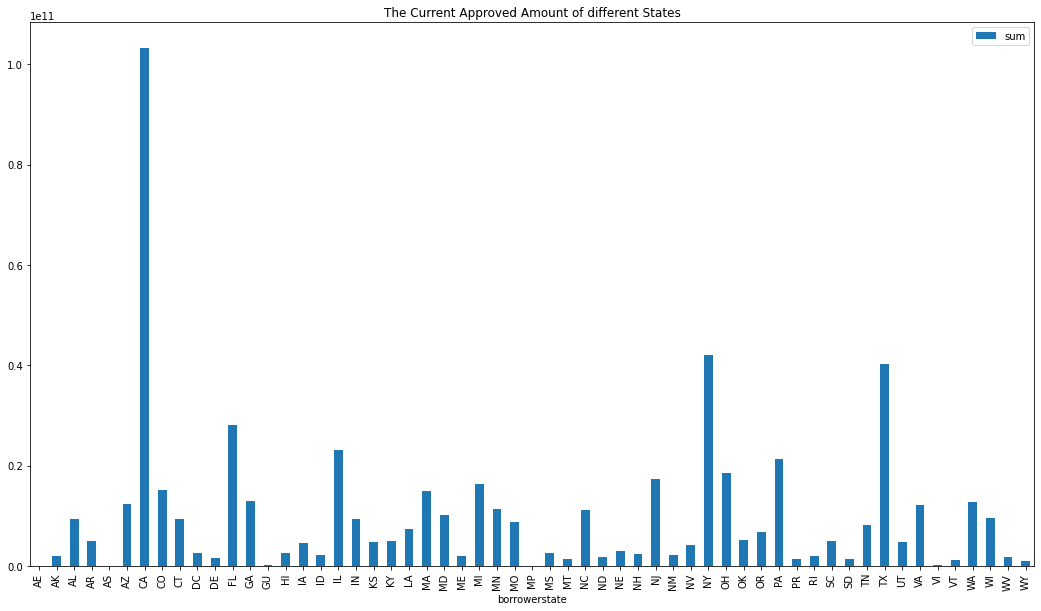

In [80]:
df.groupby('borrowerstate')['currentapprovalamount'].agg(['sum']).plot.bar(figsize=(18,10))
plt.title('The Current Approved Amount of different States')

### Observation : 'California' has received the highest loan amount, followed by 'New York' and 'Texas'

## 2)Which Business Type has receieved the Maximum Support?

Text(0.5, 1.0, 'Businesses and the support they have receieved')

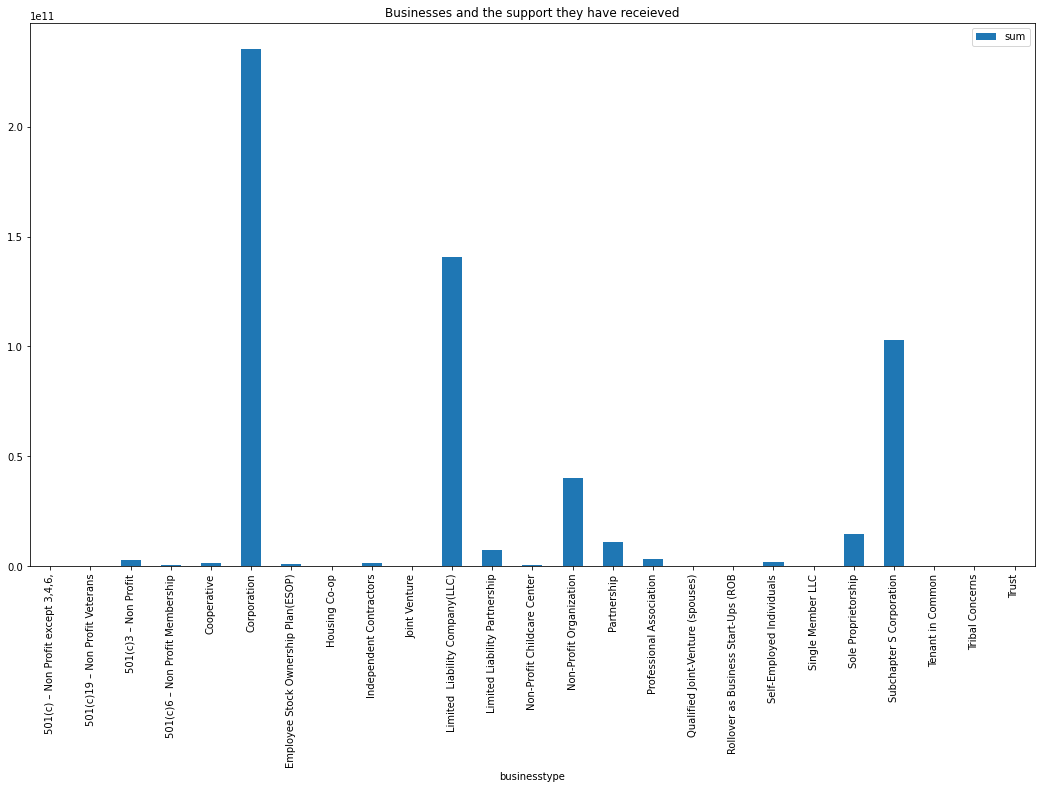

In [81]:
df.groupby('businesstype')['currentapprovalamount'].agg(['sum']).plot.bar(figsize=(18,10))
plt.title('Businesses and the support they have receieved')

### Observation : 'Corporations', 'Limited Liability Companies' and 'Subchapter Corporations' have received the Maximum Financial Support

## 3)Ratio of each Business Type

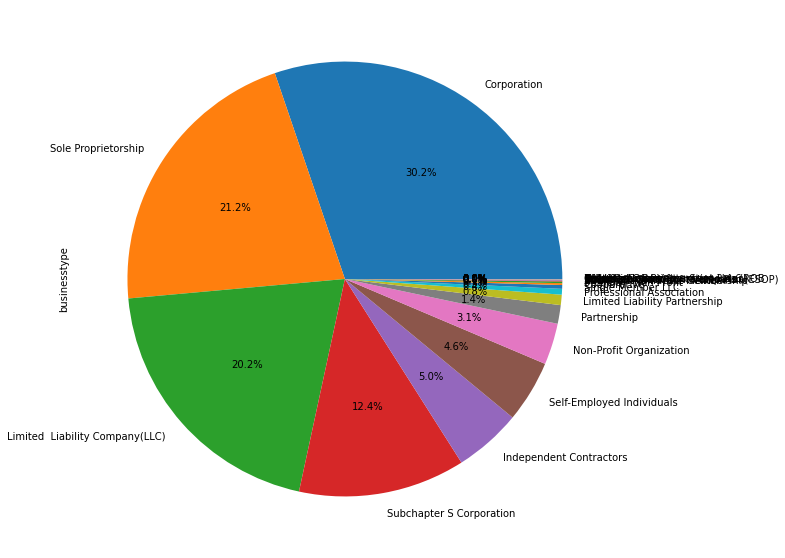

In [82]:
plt.figure(figsize=(12,10))
df['businesstype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

## 4)Which States have lent out Maximum Loan Amount?

Text(0.5, 1.0, 'The States which have lent out Maximum Financial Help')

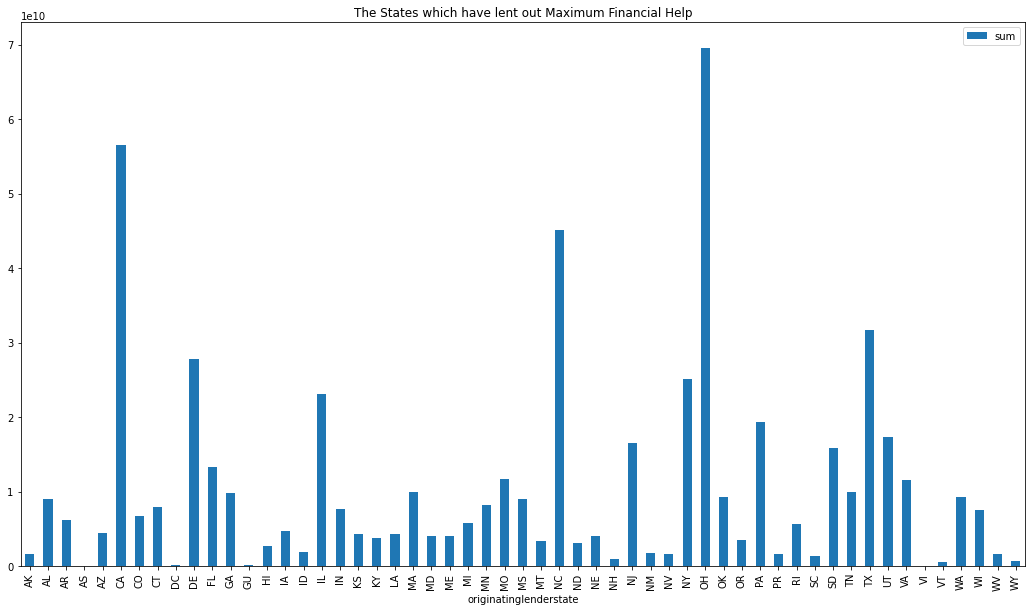

In [83]:
df.groupby('originatinglenderstate')['currentapprovalamount'].agg(['sum']).plot.bar(figsize=(18,10))
plt.title('The States which have lent out Maximum Financial Help')

## Observation : 'Ohio' has lent out the maximum help, followed by 'California' and 'North Carolina'

## 5)Which States have Forgiven the maximum amount?

In [84]:
df_maxloan = pd.pivot_table(df[['originatinglenderstate','forgivenessamount']], 
                        index=['originatinglenderstate'], 
                        values='forgivenessamount',
                        aggfunc='sum')
df_maxloan.sort_values(by='forgivenessamount', ascending=False).head(10)

,forgivenessamount
originatinglenderstate,
OH,6.229504e+10
CA,4.966073e+10
NC,4.062486e+10
TX,2.952803e+10
DE,2.488624e+10
IL,2.168697e+10
NY,2.155438e+10
PA,1.713091e+10
UT,1.486771e+10


<AxesSubplot:title={'center':'Lending State vs Highest Forgiveness Amount'}, xlabel='Lending State', ylabel='Forgiveness Amount'>

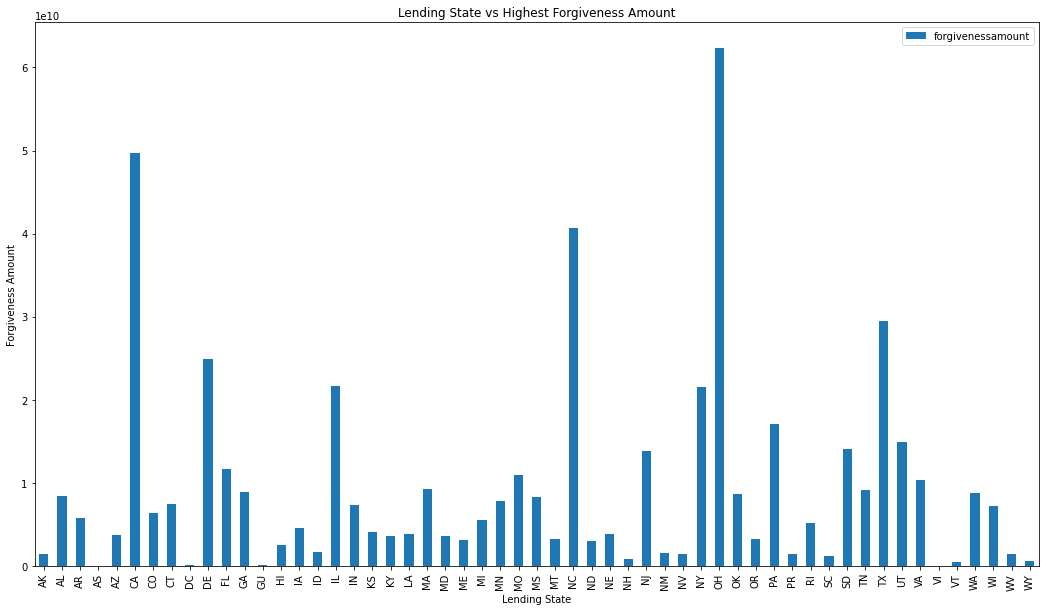

In [85]:
df_maxloan.plot(kind='bar', title='Lending State vs Highest Forgiveness Amount', ylabel='Forgiveness Amount',
         xlabel='Lending State', figsize=(18,10))

### Observation : 'Ohio' has forgiven the maximum amount, followed by 'California' and 'North Carolina'. <font color = green>Very generous of Ohio :)</font>

## 6)State Average vs National Average

In [86]:
# National Average
df['currentapprovalamount'].mean()

204624.31065078534

In [87]:
# State Average of Amount Received
df_stateavg=df.groupby('borrowerstate')['currentapprovalamount'].agg(['mean'])
df_stateavg

,mean
borrowerstate,
AE,15996.750000
AK,86417.901092
AL,55522.680623
AR,48966.155110
AS,38975.571420
AZ,73191.960041
CA,81188.417538
CO,78328.816373
CT,134203.707158


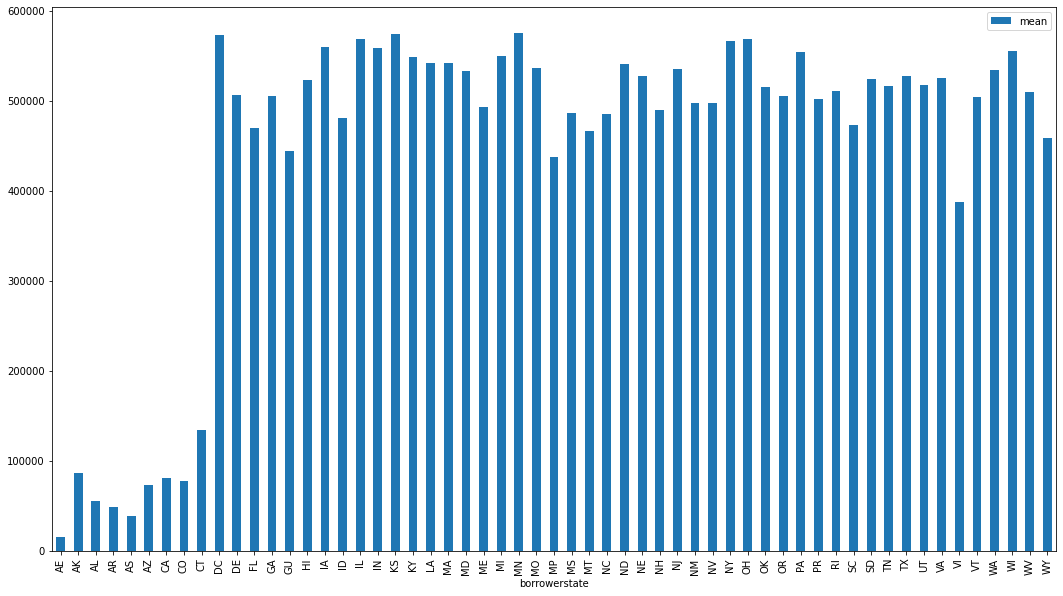

In [88]:
df_stateavg.plot.bar(figsize=(18,10))
plt.show()

In [89]:
# State Average Amount Received
df_stateavg_lent=df.groupby('originatinglenderstate')['currentapprovalamount'].agg(['mean'])
df_stateavg_lent

,mean
originatinglenderstate,
AK,87843.159793
AL,117012.860138
AR,86273.453870
AS,27146.868840
AZ,48358.298907
CA,127607.954512
CO,93019.836149
CT,194401.291819
DC,498617.131786


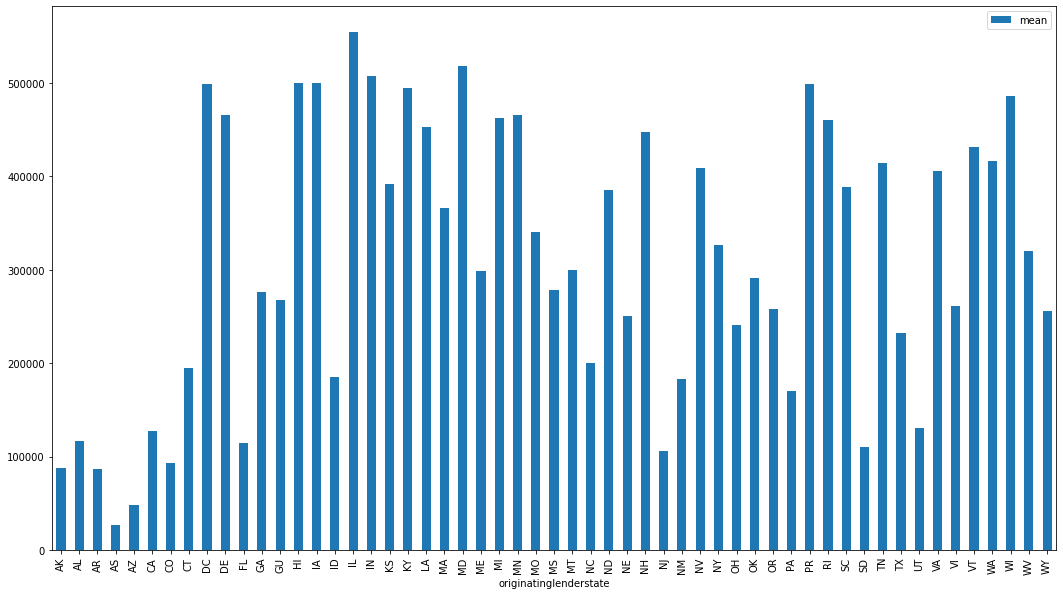

In [90]:
df_stateavg_lent.plot.bar(figsize=(18,10))
plt.show()

## 7)Loan Amount Sanctioned for Male Business Owners vs Female Business Owners

Text(0.5, 1.0, 'Loan Amount Received by Male Business Owners vs Female Business Owners')

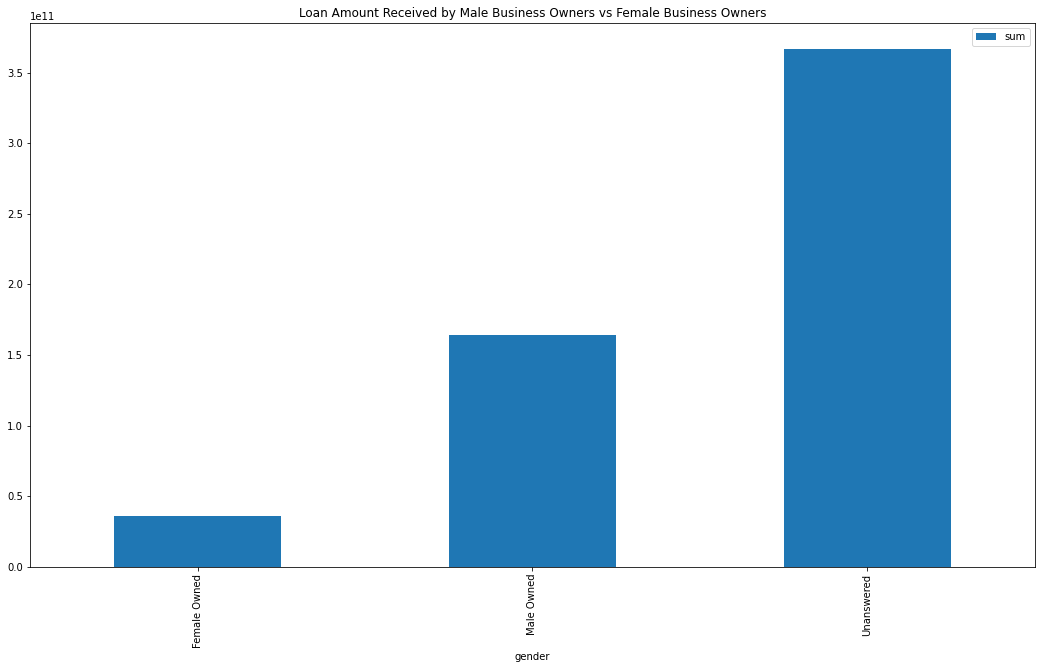

In [91]:
df.groupby('gender')['currentapprovalamount'].agg(['sum']).plot.bar(figsize=(18,10))
plt.title('Loan Amount Received by Male Business Owners vs Female Business Owners')

### Observation : Male Business Owners are 3x more likely to receive a Loan when compared to Female Business Owners. 
### Mysogyny winning over Women Empowerment endeavours! *face-palm moment*

## 8)Total Loan Amount received by different races

Text(0.5, 1.0, 'Loan Amount Received by Different Races')

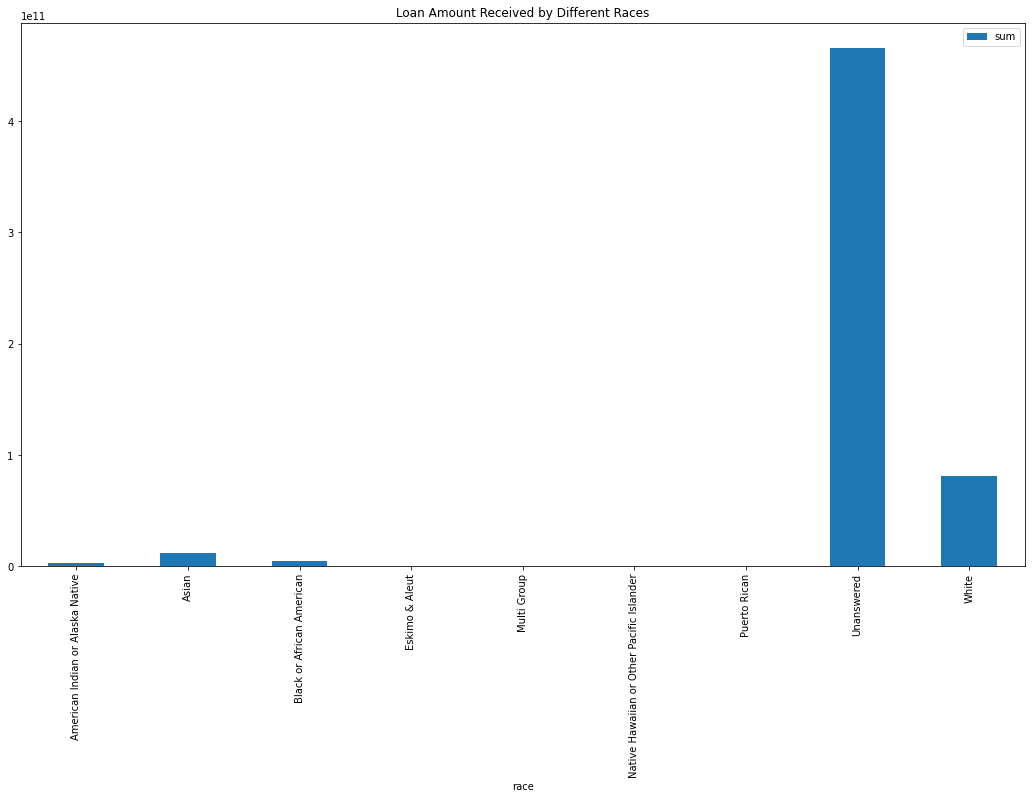

In [92]:
df.groupby('race')['currentapprovalamount'].agg(['sum']).plot.bar(figsize=(18,10))
plt.title('Loan Amount Received by Different Races')

### Observation : White Business Owners are preffered by Lending Agencies

## 9)Who are the Top 10 most generous Lenders?

In [93]:
df_ol=df.groupby('originatinglender')['currentapprovalamount'].agg(['sum'])
top10 = df_ol.sort_values(['sum'], ascending=False).head(10)
top10

,sum
originatinglender,
"JPMorgan Chase Bank, National Association",3.153149e+10
"Bank of America, National Association",2.519386e+10
"PNC Bank, National Association",1.689092e+10
Truist Bank,1.241171e+10
"Wells Fargo Bank, National Association",9.662226e+09
KeyBank National Association,9.113303e+09
"Zions Bank, A Division of",8.597877e+09
The Huntington National Bank,8.551070e+09
"TD Bank, National Association",8.404951e+09


### Observation : JP Morgon Chase Bank has sanctioned the Highest Total Loan Amount

## 10)Which payment mode is preffered by Lending Agencies?

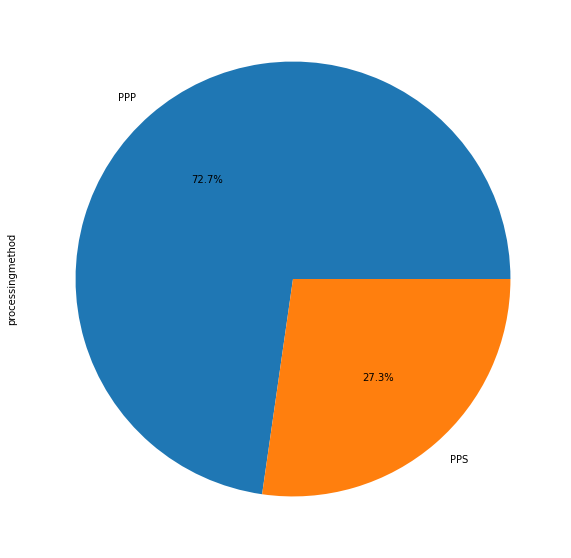

In [94]:
plt.figure(figsize=(12,10))
df['processingmethod'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

### Observation : PPP is the preffered Processing Method